In [1]:
import tensorflow as tf

In [21]:
raw_audio = tf.io.read_file(r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000001.wav')
#waveform = tf.audio.decode_wav(raw_audio)
pcm = tf.audio.decode_wav(
    raw_audio, desired_channels=8, desired_samples=-1, name=None
)


InvalidArgumentError: Bad file size for WAV: Expected 16 or 18, but got40 [Op:DecodeWav]

In [36]:
import librosa
audio_file = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\slider\id_02\normal\00000001.wav'
audio_ch, sr  = librosa.load(audio_file, sr=None, mono=False)
batch_size, num_samples, sample_rate = 1, len(audio_ch[0]), sr

In [37]:
stfts = tf.signal.stft(audio_ch[0], frame_length=1024, frame_step=256,
                       fft_length=1024)
spectrograms = tf.abs(stfts)

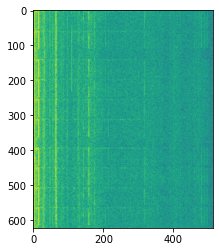

In [39]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.log(spectrograms.numpy()))

In [51]:


# Warp the linear scale spectrograms into the mel-scale.
num_spectrogram_bins = stfts.shape[-1]
lower_edge_hertz, upper_edge_hertz, num_mel_bins = 40.0, 7600.0, 64

linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
  num_mel_bins, num_spectrogram_bins, sample_rate, lower_edge_hertz,
  upper_edge_hertz)

mel_spectrograms = tf.tensordot(
  spectrograms, linear_to_mel_weight_matrix, 1)

mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(
  linear_to_mel_weight_matrix.shape[-1:]))

# Compute a stabilized log to get log-magnitude mel-scale spectrograms.
log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

# Compute MFCCs from log_mel_spectrograms and take the first 13.
mfccs = tf.signal.mfccs_from_log_mel_spectrograms(
  log_mel_spectrograms)[..., :64]


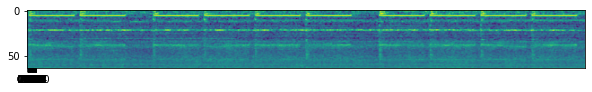

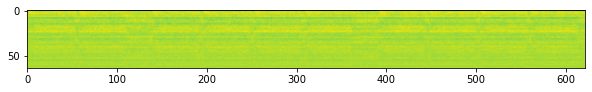

In [59]:
plt.figure(figsize=(10,20))
plt.imshow((log_mel_spectrograms.numpy().T))
plt.xticks(np.linspace(0,len(audio_ch[0])/sr, stfts.shape[0]//10))
plt.show()
plt.figure(figsize=(10,20))
plt.imshow((mfccs.numpy().T))

In [55]:
 len(audio_ch[0])

160000

In [56]:
stfts.shape

TensorShape([622, 513])

In [58]:
np.linspace(0,len(audio_ch[0])/sr, stfts.shape[0]//10)

array([ 0.        ,  0.16393443,  0.32786885,  0.49180328,  0.6557377 ,
        0.81967213,  0.98360656,  1.14754098,  1.31147541,  1.47540984,
        1.63934426,  1.80327869,  1.96721311,  2.13114754,  2.29508197,
        2.45901639,  2.62295082,  2.78688525,  2.95081967,  3.1147541 ,
        3.27868852,  3.44262295,  3.60655738,  3.7704918 ,  3.93442623,
        4.09836066,  4.26229508,  4.42622951,  4.59016393,  4.75409836,
        4.91803279,  5.08196721,  5.24590164,  5.40983607,  5.57377049,
        5.73770492,  5.90163934,  6.06557377,  6.2295082 ,  6.39344262,
        6.55737705,  6.72131148,  6.8852459 ,  7.04918033,  7.21311475,
        7.37704918,  7.54098361,  7.70491803,  7.86885246,  8.03278689,
        8.19672131,  8.36065574,  8.52459016,  8.68852459,  8.85245902,
        9.01639344,  9.18032787,  9.3442623 ,  9.50819672,  9.67213115,
        9.83606557, 10.        ])